In [16]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import os
import os.path as osp
import configparser
import pandas as pd
from typing import List

In [17]:
def load_result(dataset_name: str, model_name: str, model_type: str):
    config_path = osp.join(os.getcwd(), 'config.ini')
    parser = configparser.ConfigParser()
    parser.read(config_path)
    result_dir_path = parser['DATA_PATH']['result_path']
    result_file_path = osp.join(result_dir_path, dataset_name, model_type, f'{dataset_name}-{model_name}.csv')
    result = pd.read_csv(result_file_path)['balanced_accurary_score'].values
    result = (result * 100).tolist()
    return result

In [18]:
def filling_missing_item(item_list: List[float], max_length: int):
    current_length = len(item_list)
    result_list = [*item_list, *[None]*(max_length - current_length)]
    return result_list

In [19]:
model_type = 'General'
model_name = 'svm'

In [20]:
affectiveROAD_svm = load_result('AffectiveROAD', model_name, model_type)
dcu_svm = load_result('DCU_NVT_EXP1', model_name, model_type)
wesad_svm = load_result('WESAD_WRIST', model_name, model_type)

In [21]:
max_subject_id = max(len(affectiveROAD_svm), len(dcu_svm), len(wesad_svm))

In [22]:
subject_ids = [index for index in range(1, max_subject_id + 1)]

In [23]:
affectiveROAD_svm = filling_missing_item(affectiveROAD_svm, max_subject_id)
dcu_svm = filling_missing_item(dcu_svm, max_subject_id)
wesad_svm = filling_missing_item(wesad_svm, max_subject_id)

In [24]:
# dcu_svm = [95.4453441, 66.0968661, 88.6015326, 97.7272727, 94.4444444, 96.875, 91.8449198, None, None, None, None, None, None, None, None]

In [25]:
# affectiveROAD_svm = [91.4782609, 80.2307692, 76.7096774, 87.1693122, 87.7320955, 71.7948718, 93, 70.2380952, 85, 89.8521505, 76.6304348, 78.7407407, 90.9814324, None, None]

In [26]:
# wesad_svm = [100, 94.4444444, 100, 94.4444444, 98.3870968, 100, 83.3333333, 87.5, 100, 100, 100, 100, 100, 100, 100]

In [27]:
# dcu_svm_assume = [85.7142857, 75.5411255, 86.1486486, 91.25, 85.7142857, 77.1825397, 89.6313364, 85.7758621, 76.9585253, 81.9444444, None, None, None, None, None, None, None, None]


In [28]:
import statistics
a = [*dcu_svm, *affectiveROAD_svm, *wesad_svm]
a = [x for x in a if x != None]
print(min(a), max(a), statistics.mean(a))
statistics.median(a)

19.15660877244627 100.0 66.45664693786591


62.25051076536226

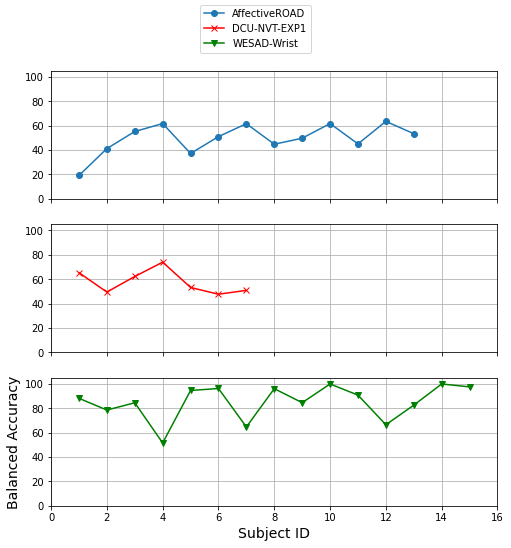

In [29]:
fig, (ax0, ax1, ax2) = plt.subplots(3, sharex=True, sharey = True, figsize=(8, 8))

ax0.plot(subject_ids, affectiveROAD_svm, marker='o', label='AffectiveROAD')
ax0.set_ylim(bottom = 0, top = 100)
ax0.grid(True)

ax1.plot(subject_ids, dcu_svm, marker='x', color='red', label='DCU-NVT-EXP1')
ax1.set_ylim(bottom = 0, top = 100)
ax1.grid(True)

ax2.plot(subject_ids, wesad_svm, marker='v', color='green', label='WESAD-Wrist')
ax2.set_ylim(bottom = 0, top = 105)
ax2.grid(True)

plt.xlabel('Subject ID', fontsize=14)
plt.ylabel('Balanced Accuracy', fontsize=14)
plt.xlim(left=0, right=16)
plt.ylim(bottom=0)
plt.figlegend(loc='upper center')
plt.show()

In [30]:
# fig, (ax0, ax1, ax2) = plt.subplots(3, sharex=True, sharey = True, figsize=(8, 8))
# ax0.plot(subject_ids[:7], affectiveROAD_svm, marker='o', label='AffectiveROAD')
# ax0.set_ylim(bottom = 0, top = 100)
# ax0.grid(True)

# ax1.plot(subject_ids, dcu_svm, marker='o', color='red', label='DCU-NVT-EXP1')
# ax1.set_ylim(bottom = 0, top = 100)
# ax1.grid(True)

# ax2.plot(subject_ids, wesad_svm, marker='o', color='green', label='WESAD-Wrist')
# ax2.set_ylim(bottom = 0, top = 105)
# ax2.grid(True)
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(subject_ids[:7], dcu_svm[:7], marker='x', color = 'red', label='Subjective Evaluation GT')
plt.plot(subject_ids[:7], dcu_svm_assume[:7], marker='o', label='Study Protocol GT')
plt.xlabel('Subject ID', fontsize=14)
plt.ylabel('Balanced Accuracy', fontsize=14)
plt.xlim(left=0, right=8)
plt.ylim(bottom=0, top=100)
# plt.figlegend(loc="upper right")
plt.grid(True)
plt.show()

NameError: name 'dcu_svm_assume' is not defined